In [121]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("DataSets/dataset.csv")
data.sample(5)

,Flower Name,Number of Flowers,Number of Leaves,Area of Roots (pixels),Number of Stems,Date,Time,Location,Shop Name,Age Gap week
41,Vanda,5,7,1820,5,8/1/2024,10:40 AM,rabukkana,Kalani Flora Orchid,adult
480,Dendrobium,1,15,1080,3,9/29/2024,3:02 PM,jaela,Senanayake Orchids,adult
221,Phalaenopsis,9,2,1660,5,9/23/2024,10:31 AM,rabukkana,Kalani Flora Orchid,adult
256,Vanda,6,5,1740,3,10/18/2024,3:25 PM,nittambuwa,Sonia Orchid Center,adult
286,Dendrobium,9,13,1610,3,9/11/2024,2:12 PM,kurunegala,Kenuja Orchid,mature


In [122]:
data['Age Gap week'].value_counts()

adult     321
young      57
child      52
mature     46
baby       24
Name: Age Gap week, dtype: int64

In [123]:
# Create a mapping for categories to numbers
category_mapping = {
    "baby": 1,
    "child": 2,
    "young": 3,
    "mature": 4,
    "adult": 5
}

# Apply the mapping to convert categories to numbers
data["Age Gap Numeric"] = data["Age Gap week"].map(category_mapping)

# Display the first few rows to confirm the conversion
print(data.head())


    Flower Name  Number of Flowers  Number of Leaves  Area of Roots (pixels)  \
0  Phalaenopsis                  5                 1                    1770   
1  Phalaenopsis                  8                 4                    1620   
2  Phalaenopsis                 10                 9                    1350   
3    Dendrobium                  9                 5                    1780   
4    Dendrobium                  2                11                    1430   

   Number of Stems        Date      Time    Location             Shop Name  \
0                2   8/23/2024   1:08 PM   kadawatha  T&Y Flower Creations   
1                5  10/16/2024  12:32 PM  kurunegala         Kenuja Orchid   
2                2   9/27/2024   2:05 PM   rabukkana   Kalani Flora Orchid   
3                1  10/14/2024  11:18 AM     gampaha         Bloom Orchids   
4                4   8/17/2024  11:05 AM  kurunegala         Kenuja Orchid   

  Age Gap week  Age Gap Numeric  
0        adult  

                        Number of Flowers  Number of Leaves  \
Number of Flowers                1.000000         -0.005589   
Number of Leaves                -0.005589          1.000000   
Area of Roots (pixels)           0.032576          0.065687   
Number of Stems                  0.025863          0.002038   
Age Gap Numeric                  0.120400          0.009425   

                        Area of Roots (pixels)  Number of Stems  \
Number of Flowers                     0.032576         0.025863   
Number of Leaves                      0.065687         0.002038   
Area of Roots (pixels)                1.000000        -0.027940   
Number of Stems                      -0.027940         1.000000   
Age Gap Numeric                       0.548771        -0.046621   

                        Age Gap Numeric  
Number of Flowers              0.120400  
Number of Leaves               0.009425  
Area of Roots (pixels)         0.548771  
Number of Stems               -0.046621  
Age Gap 

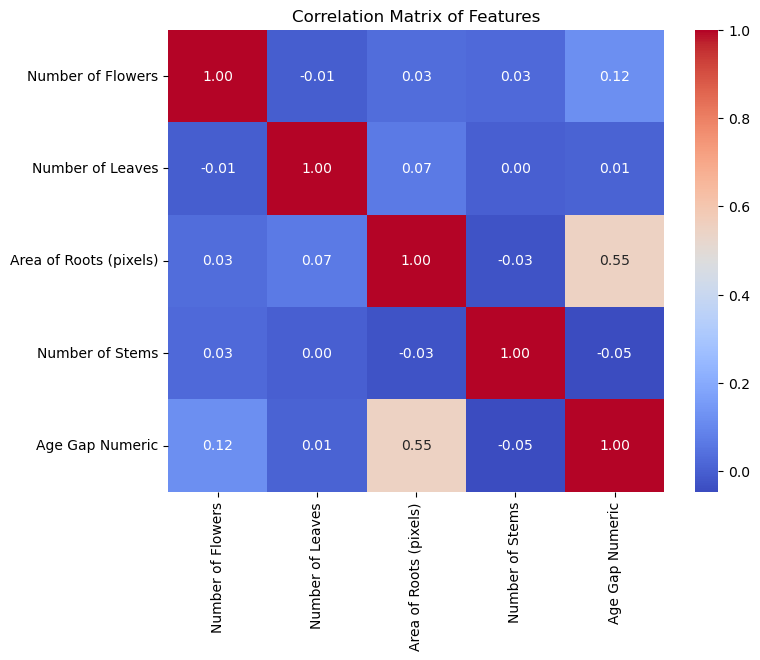

In [124]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()


In [125]:
# Check for null values in the dataset
print("Null values before removal:\n", data.isnull().sum())

# Remove rows with null values
data_cleaned = data.dropna()

# Verify that null values are removed
print("\nNull values after removal:\n", data_cleaned.isnull().sum())

# Display the cleaned dataset
print("\nCleaned dataset:")
print(data_cleaned.head())


Null values before removal:
 Flower Name               0
Number of Flowers         0
Number of Leaves          0
Area of Roots (pixels)    0
Number of Stems           0
Date                      0
Time                      0
Location                  0
Shop Name                 0
Age Gap week              0
Age Gap Numeric           0
dtype: int64

Null values after removal:
 Flower Name               0
Number of Flowers         0
Number of Leaves          0
Area of Roots (pixels)    0
Number of Stems           0
Date                      0
Time                      0
Location                  0
Shop Name                 0
Age Gap week              0
Age Gap Numeric           0
dtype: int64

Cleaned dataset:
    Flower Name  Number of Flowers  Number of Leaves  Area of Roots (pixels)  \
0  Phalaenopsis                  5                 1                    1770   
1  Phalaenopsis                  8                 4                    1620   
2  Phalaenopsis                 10        

In [126]:
# Select features (X) and target (y)
X = data[['Number of Flowers', 'Number of Leaves', 'Area of Roots (pixels)', 'Number of Stems']] 
y = data['Age Gap Numeric']

In [127]:
X.shape

(500, 4)

In [128]:
y.shape

(500,)

In [129]:

print(X.isnull().sum())
print(y.isnull().sum())


Number of Flowers         0
Number of Leaves          0
Area of Roots (pixels)    0
Number of Stems           0
dtype: int64
0


In [130]:
y.value_counts()

5    321
3     57
2     52
4     46
1     24
Name: Age Gap Numeric, dtype: int64

In [131]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())


5    321
4    321
3    321
2    321
1    321
Name: Age Gap Numeric, dtype: int64


In [132]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


In [133]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize a list to store model results
results = []

def model_executor_and_accuracy(model, model_name):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Save the model results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    })

    print(f"<<<<====== {model_name} ====>>>>")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Plot the confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["baby", "child", "young", "mature", "adult"])
    cm_display.plot(cmap='viridis', values_format='d')
    plt.show()



C:\Users\Malith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<<<<====== Logistic Regression ====>>>>
Accuracy: 0.2710


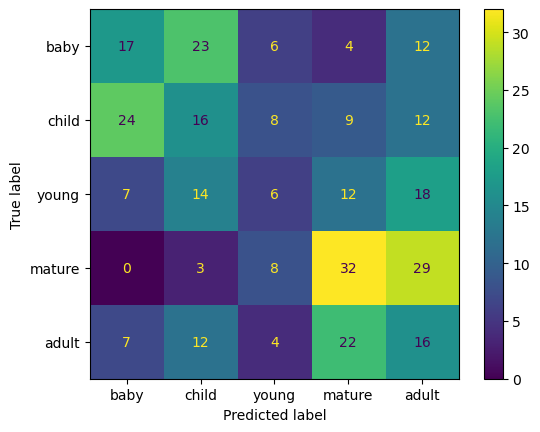

<<<<====== Decision Tree ====>>>>
Accuracy: 0.9751


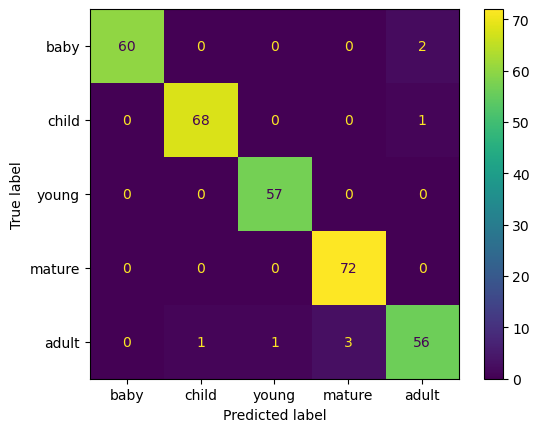

<<<<====== KNN ====>>>>
Accuracy: 0.9751


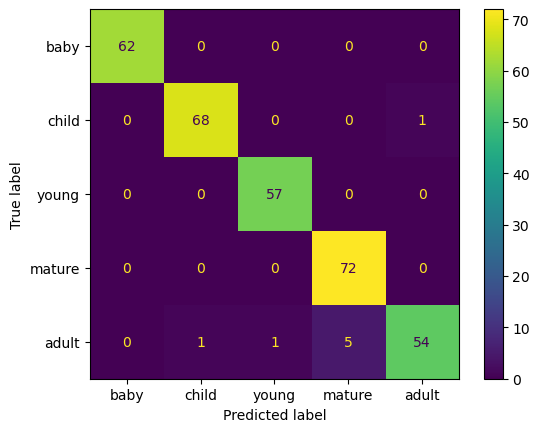

In [136]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Calling the method for each model
for model_name, model in models:
    model_executor_and_accuracy(model, model_name)

In [137]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the model with the best accuracy
best_model = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBest Model:")
print(best_model)

# Display the entire results dataframe
print("\nAll Model Results:")
print(results_df)


Best Model:
Model                                                   Decision Tree
Accuracy                                                     0.975078
Confusion Matrix    [[60, 0, 0, 0, 2], [0, 68, 0, 0, 1], [0, 0, 57...
Name: 1, dtype: object

All Model Results:
                 Model  Accuracy  \
0  Logistic Regression  0.271028   
1        Decision Tree  0.975078   
2                  KNN  0.975078   

                                    Confusion Matrix  
0  [[17, 23, 6, 4, 12], [24, 16, 8, 9, 12], [7, 1...  
1  [[60, 0, 0, 0, 2], [0, 68, 0, 0, 1], [0, 0, 57...  
2  [[62, 0, 0, 0, 0], [0, 68, 0, 0, 1], [0, 0, 57...  


Best Model: DecisionTreeClassifier()
Accuracy on test data: 0.9751


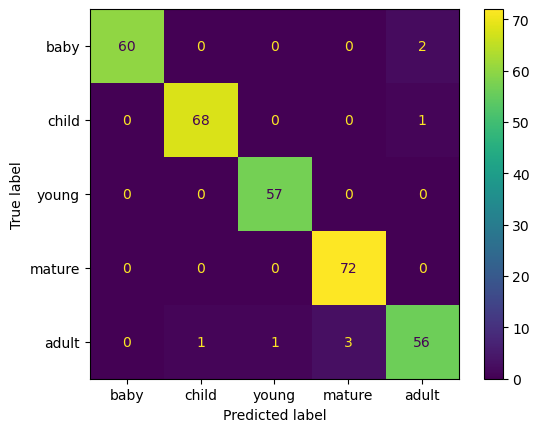

In [138]:
 best_model = DecisionTreeClassifier()
# Train the best model with the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model}")
print(f"Accuracy on test data: {accuracy:.4f}")

# Optionally, display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["baby", "child", "young", "mature", "adult"])
cm_display.plot(cmap='viridis', values_format='d')
plt.show()


In [140]:
# Manually specifying a sample
sample = [10, 7, 1630, 2]

sample = [sample] 

# Use the trained best model to make a prediction
sample_prediction = best_model.predict(sample)

# Display the prediction
print(f"Predicted Value: {sample_prediction[0]}")

if sample_prediction[0] == 1:
    print("Baby plant weeks 6 - 12")
elif sample_prediction[0] == 2:
    print("Child plant weeks 13 - 24")
elif sample_prediction[0] == 3:
    print("Young plant weeks 25 - 36")  
elif sample_prediction[0] == 4:
    print("Mature plant weeks 37 - 52")
elif sample_prediction[0] == 5:
    print("Adult plant more than 52 weeks")

Predicted Value: 5
Adult plant more than 52 weeks


C:\Users\Malith\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
